In [2]:
%matplotlib inline


좌표가있는 DataFrame에서 GeoDataFrame 만들기
---------------------------------------------------------

이 예제는 시작시``GeoDataFrame``을 만드는 법을 보여줍니다.
a * 정규 *``DataFrame``는 좌표가 WKT입니다.
(`well-known text <https://en.wikipedia.org/wiki/Well-known_text>`_)
format, or in
two columns.




In [1]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

경도 longitudes 및 위도 latitudes
=============================

먼저, 도시와 각각의 도시를 포함하는``DataFrame``을 생각해 봅시다.
경도와 위도를 표시.


In [3]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

``GeoDataFrame``은``shapely`` 객체를 필요로하므로 새로운 컬럼을 만듭니다
**Coordinates** as a tuple of **Longitude** and **Latitude** :



In [4]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))


그런 다음 튜플을 "점"으로 변환합니다.


In [5]:
df['Coordinates'] = df['Coordinates'].apply(Point)


이제``GeoDataFrame``을 만들려면``geometry``를
이전에 작성된 좌표를 작성합니다

In [6]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

``gdf`` looks like this :



In [7]:
print(gdf.head())

           City    Country  Latitude  Longitude            Coordinates
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66 -34.58)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91 -15.78)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66 -33.45)
3        Bogota   Colombia      4.60     -74.08     POINT (-74.08 4.6)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86 10.48)



마지막으로 좌표를 국가 수준의지도 위에 그립니다.

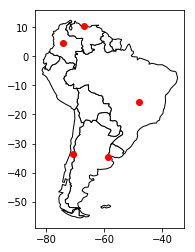

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

WKT 형식 좌표전환하기
===============

여기에서는 WKT 형식의 좌표를 갖는``DataFrame``을 고려합니다.


In [9]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-34.58 -58.66)', 'POINT(-15.78 -47.91)',
                     'POINT(-33.45 -70.66)', 'POINT(4.60 -74.08)',
                     'POINT(10.48 -66.86)']})


wkt 형식을 구문 분석하기 위해``shapely.wkt`` 하위 모듈을 사용합니다 :


In [10]:
from shapely import wkt

df['Coordinates'] = df['Coordinates'].apply(wkt.loads)

The ``GeoDataFrame`` is constructed as follows :



In [11]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

print(gdf.head())

           City    Country            Coordinates
0  Buenos Aires  Argentina  POINT (-34.58 -58.66)
1      Brasilia     Brazil  POINT (-15.78 -47.91)
2      Santiago      Chile  POINT (-33.45 -70.66)
3        Bogota   Colombia     POINT (4.6 -74.08)
4       Caracas  Venezuela   POINT (10.48 -66.86)


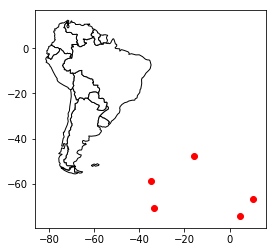

In [12]:
# WKT 형식의 좌표를 갖는``DataFrame``과 지도 좌표형식이 다를때 형태

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

CartoPy 및 GeoPandas로 플롯하기
===============

GeoPandas와 CartoPy간에 변환하여 데이터를 시각화합니다.

CartoPy는 지형 공간 시각화 생성을 전문으로하는 Python 라이브러리입니다. 그것은 좌표 참조 시스템 (CRS)을 표현하는 방법과 플롯을 구성하는 방법이 약간 다릅니다. 이 예제는 GeoPandas와 CartoPy간에 왕복 데이터 전송을 단계별로 수행합니다.


In [16]:
# sphinx_gallery_thumbnail_number = 7
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

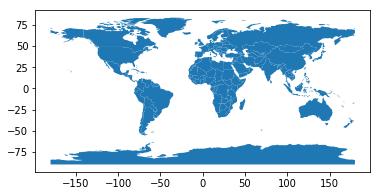

In [14]:
df.plot()

CartoPy 로 플로팅하기
===============
Cartopy는 또한 Shapely 오브젝트를 잘 처리하지만 CRS에는 다른 시스템을 사용합니다. CartoPy로이 데이터를 플롯하기 위해서는 먼저 새로운 CRS에 그것을 투영해야합니다. CartoPy에 정의 된 CRS를 사용하고 GeoPandas to_crs 메서드를 사용하여 변형을 만듭니다.

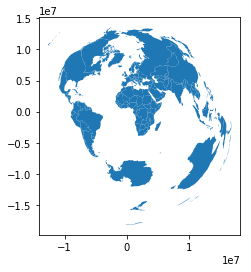

In [19]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

이제 우리의 데이터는 CartoPy를 기반으로 한 CRS에 있으므로 쉽게 플롯할 수 있습니다.

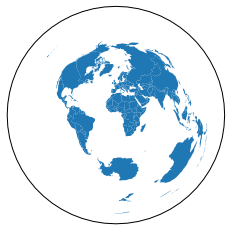

In [20]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)